<font face="XB Zar" size=5><div dir=rtl align=center>
<font face="XB Zar" size=5>
به نام خدا
</font>
<br> <br>
<font size=3>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br> <br>
<font color=blue size=5>
مقدمه‌ای بر یادگیری ماشین
</font>

<hr/> <br>
<font color=red size=6>
فصل سوم: یادگیری، ارزیابی و تنظیم‎کردن مدل‎ها 
<br>
</font>
<br>
نویسندگان: 
<br>علیرضا گرگوری مطلق
<br>
پیمان ناصری
<br>
علیرضا حیدری
<br>
مسعود خداوردیان
<hr>
</div></font>

<font face="XB Zar" size=4><div dir=rtl>
در این بخش قصد داریم که به معرفی مفاهیم پایه‌ای و البته مهمی در یادگیری ماشین بپردازیم؛ تمرکز ما برای معرفی مفاهیم مرتبط، مدل **ماشین‌های بردار پشتیبان** 
(Support Vector Machines)
می باشد؛ در ابتدا به پیاده‌سازی مدل ساده‌شده‌ای از SVM پرداخته و سپس با معرفی کتابخانه
Scikit-Learn
که یکی از مهمترین و قدرتمندترین کتابخانه‌های موجود در زمینه یادگیری ماشین است میپردازیم.
در ادامه با استفاده از ماژول‌های این کتابخانه مدل‌های پیچیده‌تری را پیاده‌سازی خواهیم کرد و نحوه ارزیابی و انتخاب مدل‌های مناسب را بر اساس معیارهای مدنظرمان فرا خواهیم گرفت.
<br> <br>
پیش از شروع بحث بهتر است به معرفی ابرصفحه (Hyperplane) و نیز حاشیه (Margin) بپردازیم:

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>ابرصفحه</font>
<br> <br>
یک ابرصفحه در فضای *p*بعدی در واقع زیرفضایی affine از بعد *p-1* می باشد.
معادله زیر بیان کننده یک ابرصفحه در فضای *p*بعدی میباشد:  
<br><center> $f(X) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p = \beta^T X + \beta_0 = 0 $
</div></font>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>در معادله بالا بردار $\beta = (\beta_1, \beta_2, ..., \beta_p)^T $ بردار نرمال بر ابرصفحه مذکور است و در واقع نشانگر جهتی میباشد که بر ابرصفحه عمود است.
</div></font>
    
    
<div>
<center>
<img src="https://images.deepai.org/glossary-terms/3bb86574825445cba73a67222b744648/hyperplane.png" width="800">
</center>
</div>

    
<font face="XB Zar" size=4><div dir=rtl>
<br> همانطور که مشاهده میکنیم، در فضای 2 بعدی ابرصفحه خط راستی با شیب $\beta_1$ و عرض از مبدا $\beta_0$ می باشد و در فضای 3 بعدی نیز، یک ابرصفحه در واقع همان صفحه است. در ابعاد بالاتر نیز با تعمیم این صفحه، دارای ابرصفحه‌ای خواهیم بود که بردار $\beta$ بر آن عمود می باشد و فضای
*$p$*-بعدی را به 2 نیم فضا تقسیم میکند؛ به گونه‌ای که در یک سمت این ابرصفحه، 
$f(X) > 0$ است و در سمت دیگر آن $f(X) < 0$ خواهد بود.
</div></font>

    
<font face="XB Zar" size=4><div dir=rtl>
<br> حال مسئله‌ای را در نظر بگیرید که میخواهیم داده‌های دو کلاس را از یکدیگر تفکیک کنیم. در صورتی که بتوانیم ابرصفحه مناسبی را پیدا کنیم که داده‌های هر کلاس در یک طرف این ابرصفحه قرار بگیرند، و برچسب کلاس‌های هر گروه را به صورت $Y^{(i)} \in \{\pm 1\}$ کدگذاری کنیم، برای هر نمونه معادله زیر برقرار خواهد بود:
<br> <center> $ Y^{(i)}f(X^{(i)}) > 0 \quad \forall i \in \{1,2,...,N\} $
</div></font>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>در شکل زیر نمونه‌ای از یک صفحه جداکننده دو کلاس در فضای 2بعدی نمایش داده شده است:
</div></font>
    
<div>
<center>
<br>
<img src="https://miro.medium.com/max/518/1*cNFo1F6VwTNvfY4cxnxiXw.png" width="400">
</center>
</div>
    
    
<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>حاشیه (Margin)</font>
<br>
<br> یک راه‌حل معقول برای جداسازی داده‌های دو کلاس، پیدا کردن ابرصفحه‌ای است که بیشترین حاشیه (Margin) را نسبت به داده‌های دو کلاس داشته باشد؛
    منظور از حاشیه فاصله این صفحه از نزدیک‌ترین داده هر کلاس است:
</div></font>

<div>
<center>
<br>
<img src="https://miro.medium.com/max/518/1*Anqz5lIxp0X7rzL6_7tpqg.png" width="400">
</center>
</div>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=6>طبقه‌بند بیشینه‌نمای حاشیه (Maximal Margin Classifier)</font> <br>
<br>از آنجا که هر ابرصفحه جداکننده‌ای را می‌توان با انتقال یا چرخش کوچکی به ابرصفحه دیگری تبدیل نمود که همچنان تمایزدهنده دو کلاس است، بی‌نهایت ابرصفحه میتواند جواب مسئله ما باشد؛ پس باید بتوانیم ابرصفحه‌ای که به طور متقارن از هر دو کلاس بیشینه فاصله را دارد، پیدا نماییم؛ به این ابرصفحه، **ابرصفحه جداکننده بهینه** 
(Optimal Separating Hyperplane)
یا **ابرصفحه جداکننده بیشینه**
(Maximal Separating Hyperplane)
میگوییم.
</div>

<div>
<center>
<br>
<img src="https://miro.medium.com/max/556/1*2Q870UIoZIM8zuwd4Vbqjg.png" width="400">
</center>
</div>

<font face="XB Zar" size=4><div dir=rtl>
<br> <br>
بنابراین مسئله ما پیدا کردن ابرصفحه‌ای شده است که حداکثر حاشیه ممکن از دو کلاس را داشته باشد؛ می‌توان به این مسئله به چشم پیدا کردن دو ابرصفحه دیگر 
$(\mathcal{H}_1, \mathcal{H}_2)$ 
که فاصله برابر و بیشینه‌ای از ابرصفحه مطلوب ما
$\mathcal{H}_0$
دارند نیز نگاه کرد؛ به طوری که داده‌های دو کلاس در دو سمت متفاوت 
$\mathcal{H}_0$
قرار بگیرند و هیچ نمونه‌ای نیز در فضای بین آن‌ها نیفتد.
شکل زیر بیانگر مطالب بالا می‌باشد:
</div>

<div>
<center>
<br>
<img src="https://miro.medium.com/max/518/1*13OzQUcoMdyJkQNIWbcvdA.png" width="400">
</center>
</div>


<div dir=rtl>
<br>بدون از دست دادن کلیت مسئله، می‌توان دو صفحه 
$(\mathcal{H}_1, \mathcal{H}_2)$ 
را به صورت زیر تعریف نمود:  
<br><center>  $\mathcal{H}_1: \quad \beta^T x^{(i)} + \beta_0 \geq 1 \qquad if \quad y^{(i)}=1 $
<br><center>  $\mathcal{H}_2: \quad \beta^T x^{(i)} + \beta_0 \leq -1 \qquad if \quad y^{(i)}=-1 $
</div>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>دو معادله بالا را می‌توان با یکدگیر ترکیب نمود و به صورت زیر نوشت:
<br><center> $y^{(i)}(\beta^T x^{(i)} + \beta_0) \geq 1 \quad \forall i \in \{1,2,...,N\} $
</div></font>
    
    
<div dir=rtl>
<br>حال باید فاصله بین دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
را پیدا کنیم تا بتوانیم با بیشینه کردن آن، صفحه
$\mathcal{H}_0$
را به صورت ابرصفحه‌ای موازی با آنها که این فاصله را به دو قسمت برابر تقسیم میکند، مشخص نماییم.
<br> <br>
یک راه توصیف حاشیه می‌تواند اینگونه باشد که حاشیه را برداری عمود بر دو ابرصفحه مذکور در نظر گرفت که اندازه این بردار برابر با مقدار حاشیه خواهد بود. پس با تعریف بردار مناسبی برای توصیف این فاصله، کافی است اندازه آن را پیدا کنیم.
<br>از آنجا که بردار وزن‌های
$\beta$
 عمود بر ابرصفحه موردنظر ما است، می توان بردار یکه $u$ را برداری هم‌جهت با بردار $\beta$ در نظر گرفت؛
پس بردار $u$ به صورت زیر می‌باشد:
<br> <center> <font size=5> $ u = \frac{\beta}{{\lVert \beta \rVert}_2} $
</div>
    
<div dir=rtl>
<br>حال کافی است بردار $u$ را در مقدار اسکالر $m$ ضرب نمود تا 
بردار $k$ را پیدا کرد که اندازه آن برابر با حاشیه $m$ می‌باشد و در راستای موردنظر نیز خواهد بود:
<br> <center> <font size=5> $ k = m.u = m.\frac{\beta}{{\lVert \beta \rVert}_2} $
</div>

<div dir=rtl>
شکل زیر توضیحات بالا را به خوبی ترسیم می‌نماید:
<center>
<img src="https://miro.medium.com/max/546/1*g4LaFAzVyxzQUpzeXuAcjA.png" width="400">
</center>
</div>
    
    
<div dir=rtl>
حال نقطه‌ی دلخواه $x_0$
را بر روی ابرصفحه
$\mathcal{H}_2$   
در نظر بگیرید و آن را با بردار $k$ جمع کنید تا به نقطه $z_0$ بر روی ابرصفحه 
$\mathcal{H}_1$ برسید.
<center>
<img src="https://miro.medium.com/max/578/1*2YfkuIfcVXQtnPcNsM-rCg.png" width="400">
</center>
</div>
    
<div dir=rtl>
از آنجا که نقطه $x_0$ بر روی $\mathcal{H}_2$ و $z_0$ بر روی $\mathcal{H}_1$ قرار گرفته‌اند، پس در معادلات زیر صدق می‌کنند:
<br> <center> $\beta^T z_0 + \beta_0 = 1 $
<br> <center> $\beta^T x_0 + \beta_0 = -1 $
</div>
    
<div dir=rtl> <br>
با کم کردن دو معادله بالا از یکدیگر خواهیم داشت:
<br> <center> $\beta^T (z_0 - x_0) = 2$
</div>

<div dir=rtl> <br>
از طرفی $z_0 = x_0 + k$ می‌باشد؛ پس
<br> <center> $\beta^T k = \beta^T . m\frac{\beta}{{\lVert \beta \rVert}_2} = 2 \Rightarrow $
<br><br> <center> $ m.\frac{{\lVert \beta \rVert}_2 ^2}{{\lVert \beta \rVert}_2} = m.{\lVert \beta \rVert}_2 = 2 \Rightarrow$
<br><br> <center> <font size="5"> $ m = \frac{2}{{\lVert \beta \rVert}_2} $ <br>
</div>  
    
    
<div dir=rtl> <br>
پس با توجه به نتایج بالا، فاصله بین دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
برابر با
$ m = \frac{2}{{\lVert \beta \rVert}_2} $
می‌باشد و جهت بیشینه کردن این مقدار، باید مخرج آن، یعنی اندازه بردار نرمال را کمینه نمود.
به نمونه‌هایی که بر روی دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
قرار میگیرند و در تعیین نمودن ابرصفحه جداکننده بهینه نقش دارند، بردارهای پشتیبان (support vectors) گفته می‌شود. شکل زیر به طور نمادین تمام نتایج بالا را دارا میباشد:
</div>
    
<div> <br>
<center>
<img src="https://www.researchgate.net/profile/Anil-Goyal-2/publication/328576527/figure/fig2/AS:686934884114432@1540789447256/Maximum-margin-hyperplane-for-a-binary-SVM-Support-vectors-are-marked-with-a-green.ppm" width="400">
</center>
</div>
    

<div dir=rtl> <br>
<br> با جمع بندی نتایج و توضیحات بالا، ما به‌دنبال حل کردن مسئله بهینه‎سازی زیر می‌باشیم:
\begin{equation}
    \begin{aligned}
        \min_{\beta,\beta_0} \quad & \frac{1}{2}||\beta||_2 ^2\\
        \textrm{s.t.} \quad & y^{(i)}(\beta^T x^{(i)} +\beta_0) \geq 1 \quad \forall i \in \{1,2,...,N\}\\
    \end{aligned}
\end{equation}
    
<br><div dir=rtl> (همانطور که می‌دانید کمینه کردن اندازه یک بردار با کمینه کردن توان دو اندازه آن بردار، معادل می‌باشد و برای سادگی محاسبات در ادامه از این نکته استفاده کرده‌ایم!) <br>
(همچنین استفاده از ضریب $\frac{1}{2}$ نیز جهت تسهیل نتایج مشتق گرفتن در ادامه می‌باشد!)
</div>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=6>پیاده‌سازی Maximal Margin Classifier</font> <br>
    
<div dir=rtl> <br> مسئله مقید بالا یک مسئله بهینه‌سازی محدب می‌باشد و در ادبیات بهینه‌سازی محدب از آن به عنوان برنامه‌نویسی مرتبه دوم 
(Quadratic Programming)
یاد می‌شود. در صورت علاقمندی به مطالعه بیشتر راجع‌به Quadratic Programming می‌توانید به لینک زیر مراجعه نمایید:
<br> <div dir=ltr> <a href="https://en.wikipedia.org/wiki/Quadratic_programming">Quadratic Programming (QP)</a>
</div>
    
<div dir=rtl> <br>
با توجه به محدب بودن مسئله بالا، وجود جوابی جهت کمینه کردن تابع هدف تضمین می‌شود؛ پس می‌توان با معرفی تابع هزینه مناسبی برای مسئله بالا، به طوری که عبارت را از حالت مقید خارج سازد، آن را با روش‌های مرسوم بهینه‌سازی همچون Gradient Descent حل نماییم:
</div>

In [7]:
class maxMargin_classifier:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        pass

    def _init_weights_bias(self, X):
        pass

    def _get_cls_map(self, y):
        pass

    def _satisfy_constraint(self, x, idx):
        pass
    
    def _get_gradients(self, constrain, x, idx):
        pass
    
    def _update_weights_bias(self, dw, db):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass

In [8]:
class maxMargin_classifier:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

In [19]:
from sklearn import datasets
import numpy as np


N = 250
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=1.05, random_state=1
)

frac = 0.8
train_size = int(frac*N)
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:, :]
y_test = y[train_size:]

clf = maxMargin_classifier(n_iters=1000)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 100.0 %


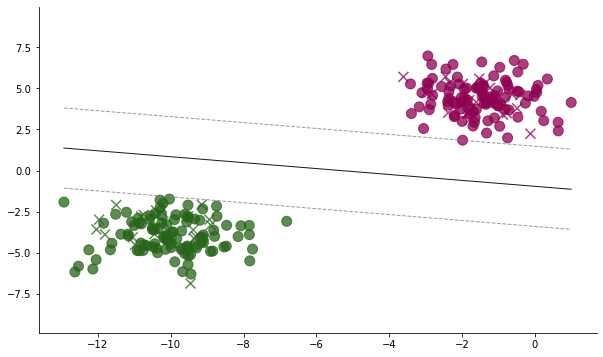

In [22]:
import matplotlib.pyplot as plt

def get_hyperplane(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('PiYG')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.show()